In [5]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, X_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/verlo/venv/Tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8865 - loss: 0.3911 - val_accuracy: 0.9628 - val_loss: 16.9037
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9727 - loss: 0.0930 - val_accuracy: 0.9763 - val_loss: 11.2500
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accuracy: 0.9790 - val_loss: 10.5616
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9900 - loss: 0.0340 - val_accuracy: 0.9807 - val_loss: 10.7199
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9931 - loss: 0.0236 - val_accuracy: 0.9806 - val_loss: 11.6554
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9945 - loss: 0.0192 - val_accuracy: 0.9784 - val_loss: 13.0318
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9958 - loss: 0.0146 - val_accuracy: 0.9826 - val_loss: 12.3898
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accur

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

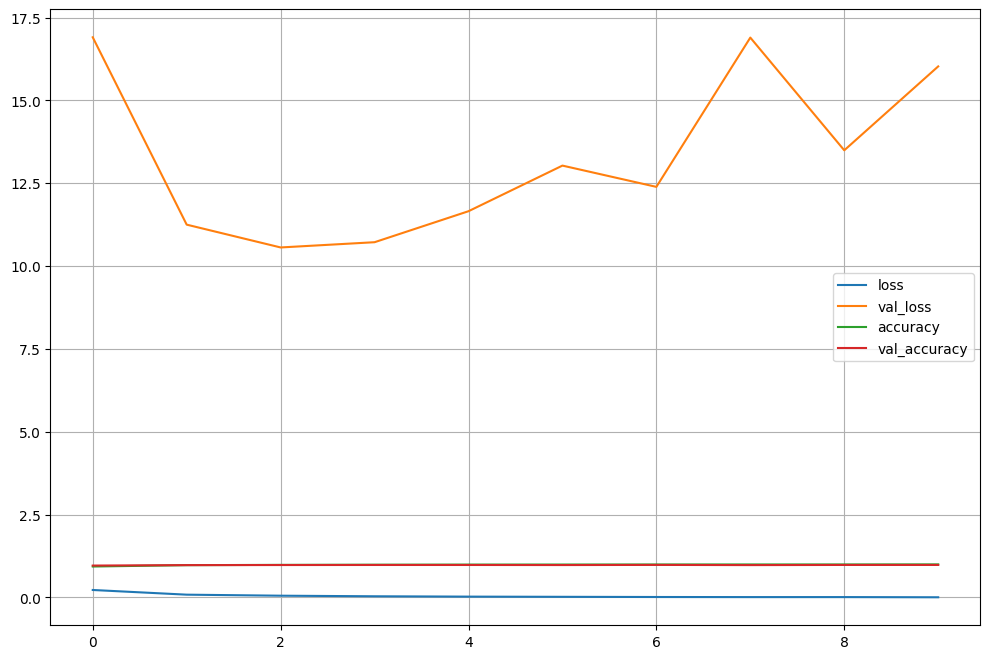

In [10]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9772 - loss: 19.9357
Test loss : 16.024763107299805
Test accuracy : 0.9814000129699707


In [12]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
wrong_resutl = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_resutl.append(n)

len(wrong_resutl)

186

In [15]:
import random

samples = random.choices(population=wrong_resutl, k=16)
samples

[6571,
 2272,
 6173,
 9770,
 2272,
 3117,
 684,
 4078,
 321,
 2135,
 1395,
 274,
 4194,
 4314,
 4078,
 9745]

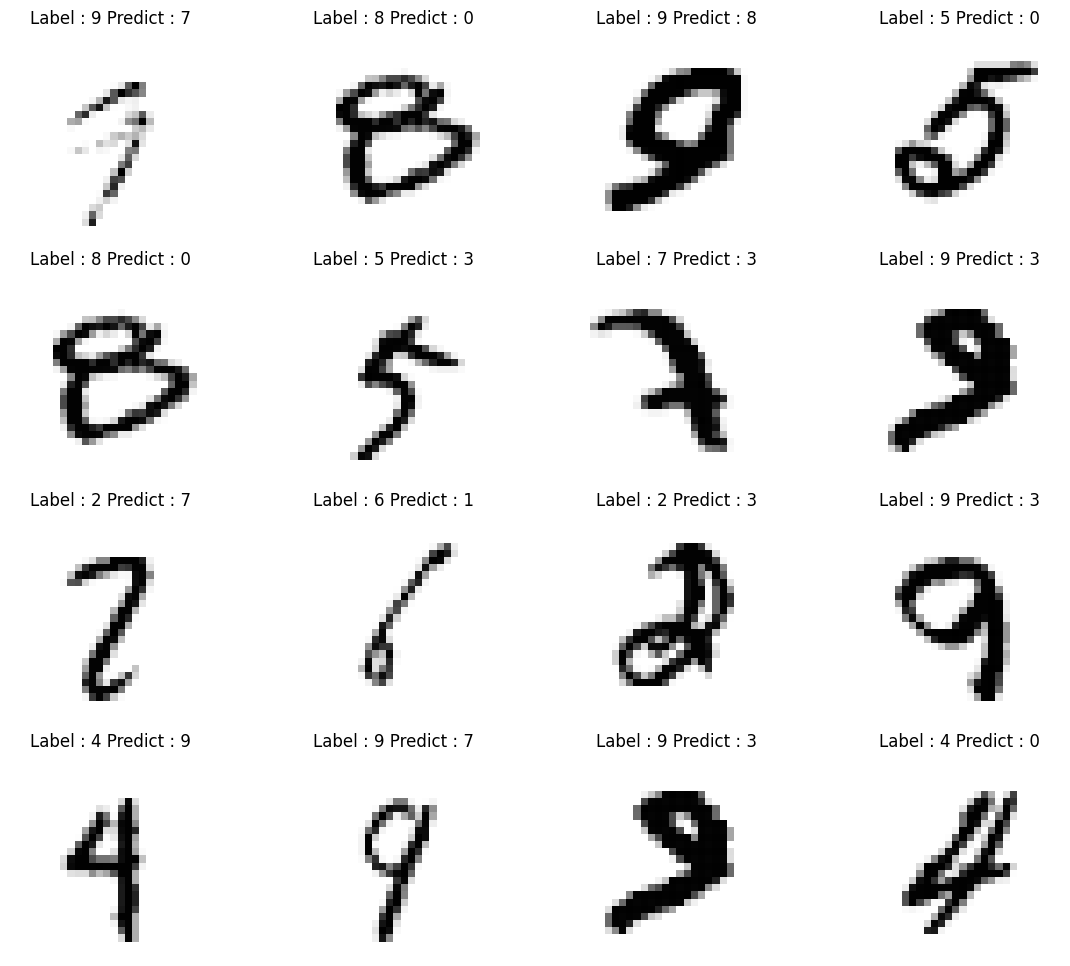

In [17]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()